In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import preprocess
import classifiers
import feature_reduce
import time

In [2]:
path_to_db='../ESC-50/'
df = pd.read_csv(path_to_db + 'meta/esc50.csv')

In [3]:
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


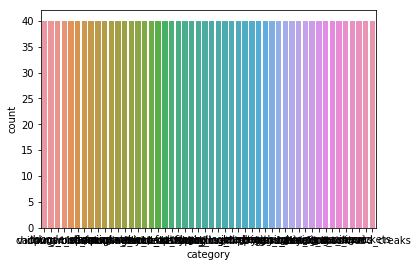

In [4]:
sns.countplot(df['category'])

## Preprocessing
Just MFCC were sufficient in previous work.
13 coefficients together with first and second derivatives and remove first energy component.
Should yield vector of 38 features per time frame.

In [5]:
start_time = time.time()
p1_data = preprocess.preprocess_fold(1, df, path_to_db + 'audio/', parallel=True)
print(time.time() - start_time)

/nethome/plogas3/miniconda3/envs/gmm/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/nethome/plogas3/miniconda3/envs/gmm/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/nethome/plogas3/miniconda3/envs/gmm/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`.

/nethome/plogas3/miniconda3/envs/gmm/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/nethome/plogas3/miniconda3/envs/gmm/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/nethome/plogas3/miniconda3/envs/gmm/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`.

32.32913780212402


In [6]:
p1_data.shape

(76998, 38)

In [7]:
p1_data.nbytes

23407392

## Background GMM
Used to compute p(a|background), the likelihood of observing an audio document a given background model.

In [8]:
start_time = time.time()
g = classifiers.cpu_train('gmm', 15, p1_data)
print(time.time() - start_time)

26.725353956222534


In [8]:
start_time = time.time()
g = classifiers.gpu_train('gmm', 128, p1_data[:1000,:])
print(time.time() - start_time)

1.5853755474090576


In [10]:
g.get_weights()

array([0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125,
       0.0078125, 0.0078125, 0.0078125, 0.0078125, 

In [11]:
g.get_means()

array([[ 1.87376690e+01, -6.86549149e+01,  4.64244032e+00, ...,
        -9.54570115e-01, -3.10272098e-01,  4.13033605e-01],
       [ 3.43889961e+01, -8.49350967e+01,  2.00238895e+00, ...,
         8.33097696e-02, -2.58796811e-01,  2.08488035e+00],
       [ 2.29492054e+01, -5.73079681e+01,  9.11484241e+00, ...,
        -3.20522971e-02, -1.25911325e-01,  3.71120036e-01],
       ...,
       [ 2.47357216e+01, -5.31595268e+01,  2.67411089e+00, ...,
         3.89135867e-01,  3.72040361e-01, -4.44455564e-01],
       [ 2.26002846e+01, -5.04040604e+01,  9.28847122e+00, ...,
         2.27951109e-01,  1.63682520e-01, -1.42054367e+00],
       [ 8.84129944e+01, -1.01911224e+02, -4.04603233e+01, ...,
         5.37931979e-01,  6.87167406e-01, -6.35436401e-02]], dtype=float32)

## Category GMM

In [ ]:
dog_df = df[df['category'] == 'dog']
dog_df.head()

In [ ]:
dog1_data = preprocess.preprocess_fold(1, dog_df, path_to_db + 'audio/')

In [ ]:
dog = classifiers.cpu_train('gmm', 15, dog1_data, dog_df['category'])

In [ ]:
scores = dog.predict(dog1_data)
scores.mean()

In [ ]:
scores

In [ ]:
dog = classifiers.gpu_train('gmm', 15, dog1_data, dog_df['category'])

In [ ]:
dog1_data

In [ ]:
scores = dog.predict(dog1_data)
scores.mean()